# Classification with Breast Cancer Wisconsin (Diagnostic) Data Set

## 1. Introduction
Here, I will walk through the process of building a machine learning classification algorithm. It will start with getting explosing the data and visualization.

- Dimensionality reduction
- Binary classification
Here we will look at how useful dimensionality can be important in data visualization and then perform some classification on the ovarian toy data from scikit-learn

### Data description:
The data has 212 - Malignant, 357 - Benign cases. There  measured parameters includes:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

In addition to these, the mean values presented, the standard error and worst or largest are also computed, making it three measurements per fearture (30 features in total).

Some credit to online sources including HML and LinkedIn course on ML Algo

Importing useful packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import seaborn as sns
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)
import pandas as pd
%matplotlib inline

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          #'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

The data contain fields listed below

In [3]:
cancer_data = load_breast_cancer()
data = cancer_data.data
target = cancer_data.target
targets_names = cancer_data.target_names
feature_names = cancer_data.feature_names

In [5]:
cancer_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

## 2. Exploration

Check what is under each of the keys

In [6]:
print("Target names: ", targets_names)
print("--------------------------------------------------------------------")
print("Feature names: ",feature_names)

Target names:  ['malignant' 'benign']
--------------------------------------------------------------------
Feature names:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Lets, condider the feaures whose mean value and error are reported. The names are pretty long so lets rename them

In [7]:
for i in range(len(feature_names[:10])):
    name = feature_names[i].split()
    if len(name) == 2:
        feature_names[i] = name[1]
    elif len(name) > 2:
        feature_names[i] = name[1]+'_'+name[2]
        
print(feature_names[:10])

['radius' 'texture' 'perimeter' 'area' 'smoothness' 'compactness'
 'concavity' 'concave_points' 'symmetry' 'fractal_dimension']


Percentage composition: Lets check the number of malignant and benign

In [8]:
print("There are a %d cases of which there are %d benign and %d malignant." %(len(target), sum(target), len(target)-sum(target) ))

There are a 569 cases of which there are 357 benign and 212 malignant.


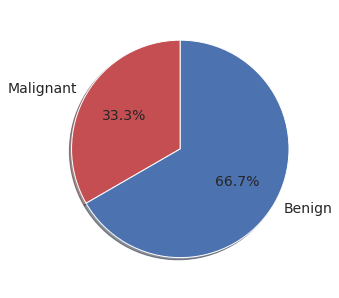

In [9]:
slices_hours = [4, 8]
activities = ['Malignant', 'Benign']
colors = ['r', 'b']
fig, ax = plt.subplots( figsize = (5,5))
ax.pie(slices_hours, labels=activities, colors=colors, startangle=90,shadow=True,
       autopct='%1.1f%%',  textprops={'fontsize': 14})
plt.show()

This is particularly useful when we are splitting the data for machine learning training

Next we want to generate a heat map showing the relation between these features. The data is first converted to a dataframe.

In [10]:
data_df = pd.DataFrame(data, columns=feature_names)
data_df.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
data_df.tail()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


There is a relation with most of the feaures, so a heat map of the 10 features:

In [13]:
data_df[feature_names[:10]].head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


The covariance matrix is plotted below. This matrix illustrate the correlations between the columns. The more the value is closer to 1, the stronger the correlation. This Explains why the diagonals are 1. 

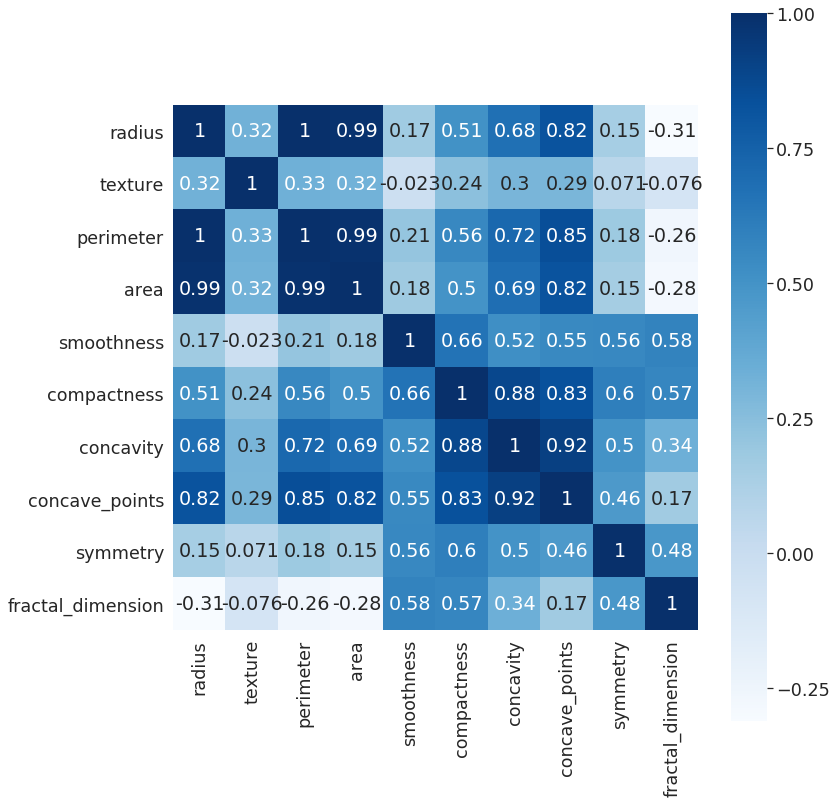

In [12]:
data_s = data_df[feature_names[:10]]

sns.set(font_scale=1.6)
plt.figure(figsize=(12,12))
corr_matrix = data_s.corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, square=True, cmap='Blues')

plt.tight_layout()

What do we learn from the correlation plot above? Generally correlation tells us which variables are related. As a result, highy correlated values are less informative. The correlations matrix clearly confirms some obvious expections. 

For example, see the entry for (area, radius) and (area, perimeter). Given that the area of a region is related to the radius e.g $\mathbf{A_\text{Circle}} = \pi r^2= r*\mathrm{perimeter}/2$, the strong correlation of 0.99 is explained.

Let'c check with columns are highly correlated and which are not. If we use that any correlation coefficient between -0.5, and 0.5 is less correlated we get that the correlated  indices are

In [13]:
corr_matrix_index = ['texture', 'area', 'smoothness', 'compactness',
       'concavity', 'concave_points', 'symmetry', 'fractal_dimension']

We can use the folowing function to fet the uncorrelated columns

In [16]:
high_corr_features = set()
less_corr_featiures = {'area'}

for row in corr_matrix.index:
    for column in corr_matrix.index:
        if (abs(corr_matrix.loc[row, column]) < .99) and (column not in high_corr_features):
            less_corr_featiures.update([column])
        high_corr_features.update([column])
        
print('Correlated features: ', high_corr_features)
print()
print('Uncorrelated features: ', less_corr_featiures)

Correlated features:  {'compactness', 'area', 'smoothness', 'symmetry', 'concavity', 'radius', 'concave_points', 'fractal_dimension', 'texture', 'perimeter'}

Uncorrelated features:  {'compactness', 'area', 'symmetry', 'texture', 'concave_points', 'fractal_dimension', 'smoothness', 'concavity'}


In [17]:
np.abs(corr_matrix) < 0.5

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
radius,False,True,False,False,True,False,False,False,True,True
texture,True,False,True,True,True,True,True,True,True,True
perimeter,False,True,False,False,True,False,False,False,True,True
area,False,True,False,False,True,True,False,False,True,True
smoothness,True,True,True,True,False,False,False,False,False,False
compactness,False,True,False,True,False,False,False,False,False,False
concavity,False,True,False,False,False,False,False,False,False,True
concave_points,False,True,False,False,False,False,False,False,True,True
symmetry,True,True,True,True,False,False,False,True,False,True
fractal_dimension,True,True,True,True,False,False,True,True,True,False


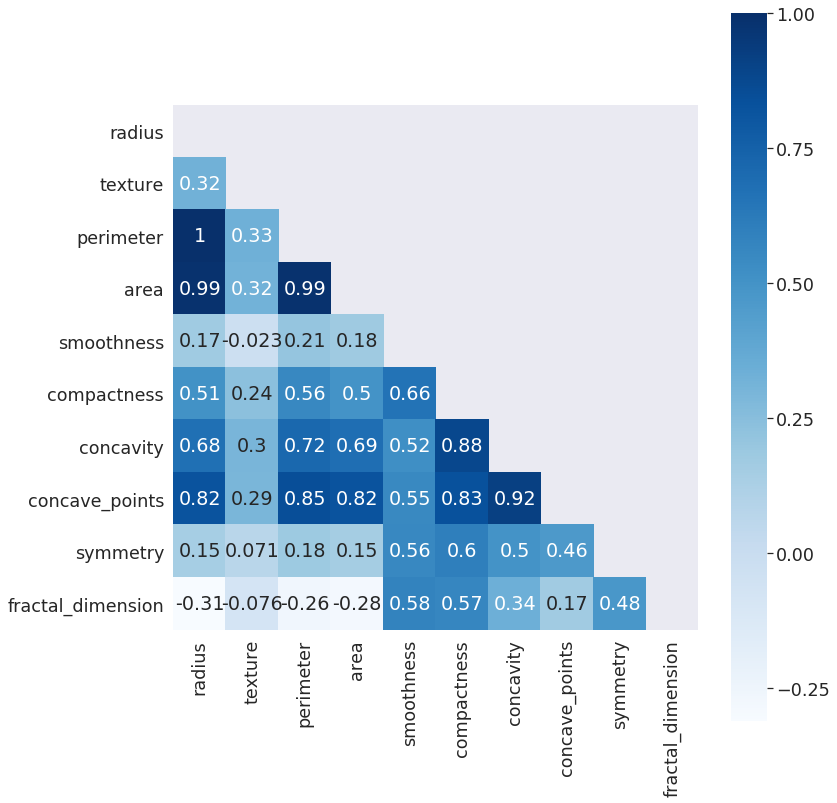

In [18]:
data_s = data_df[feature_names[:10]]

sns.set(font_scale=1.6)
plt.figure(figsize=(12,12))
corr_matrix = data_s.corr()
#------------------------------------------------------------------------------------------------------------------
# Mask for the upper triangle since it is symmetric

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#------------------------------------------------------------------------------------------------------------------
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, annot=True, square=True, cmap='Blues')



# Draw the heatmap
#sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
#           square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

What do we identify from this?
The correlations tells is us that we can reduce some of the features and still retain most of the information deduced on the whole data. This leads us to dimension reduction

## 3. Dimension Reduction

One way to get the PCA is via the covariance matrix. This matrix measures the correlations between the rows or columns we have $C_X = \frac{1}{n-1}XX^T$ where n is the number of features or columns in a data set. It should be noted that in out case, the matrix $X$ is NOT writed in the form desired by PCA ( i.e features are columns --$X^T$ ) and so $X$_stc in our case equals $X^T$ Here, X is the matrix with columns equal the first 10


We can do this manually or use scikit-learn. We will do both. 

- Manual calculation

Below, $U$ in $n\times n$ and $V$ in $p\times p$ where $n = 569, p = 10$

In [31]:
X_centered = data_s - data_s.mean(axis=0)
U, s, V = np.linalg.svd(X_centered)
c1 = V.T[:, 0]
c2 = V.T[:, 1]

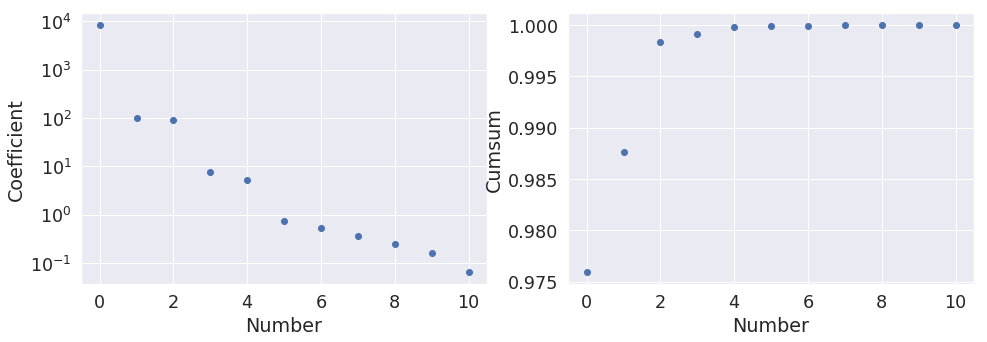

In [32]:
fig,  (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
# Plotting thee coefficients:
ax1.semilogy(s, 'o')
ax1.set_xlabel('Number')
ax1.set_ylabel('Coefficient')

# Plotting thee coefficients:
ax2.plot(np.cumsum(s)/np.sum(s), 'o')
ax2.set_xlabel('Number')
ax2.set_ylabel('Cumsum')
plt.show()

From the plot above we can notice that the first three coefficients can give significant information. That, is only the first three eigen values are important. We will project the data to the subspace of these matrices and then visualize.

In [33]:
W2 = V.T[:, :2]
reduced_data = X_centered.dot(W2)
reduced_data.shape

(569, 2)

As expected, the data is sinificantly reduced.

Below is a 2D visualization of the data. We can notice that there is a clear separation between the two regions

Text(0, 0.5, 'PCA 2')

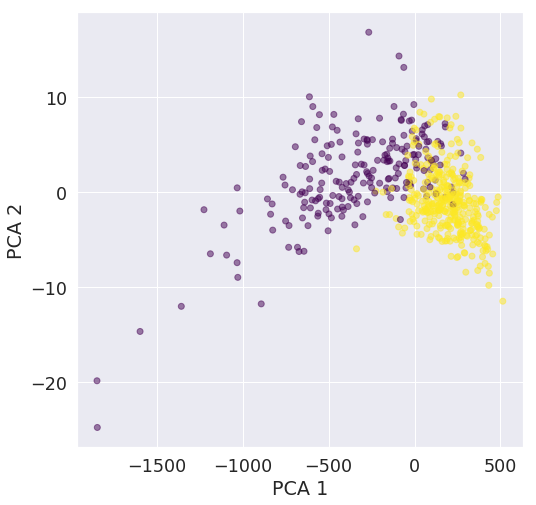

In [34]:
fig, ax = plt.subplots( figsize = (8,8))
plt.scatter(reduced_data.loc[:,0], reduced_data.loc[:,1], alpha=0.5,
             c=target, cmap='viridis') #s=100*features[3],
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

This simplistic representation is a remind of how possible it is to reduce the scatter plot. The full version of the the scatter plot is gotten by adding the target to data_s to get

In [35]:
data_s['target'] = pd.Series(target, index=data_df.index)

/home/siro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
data_s.head(2)

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0


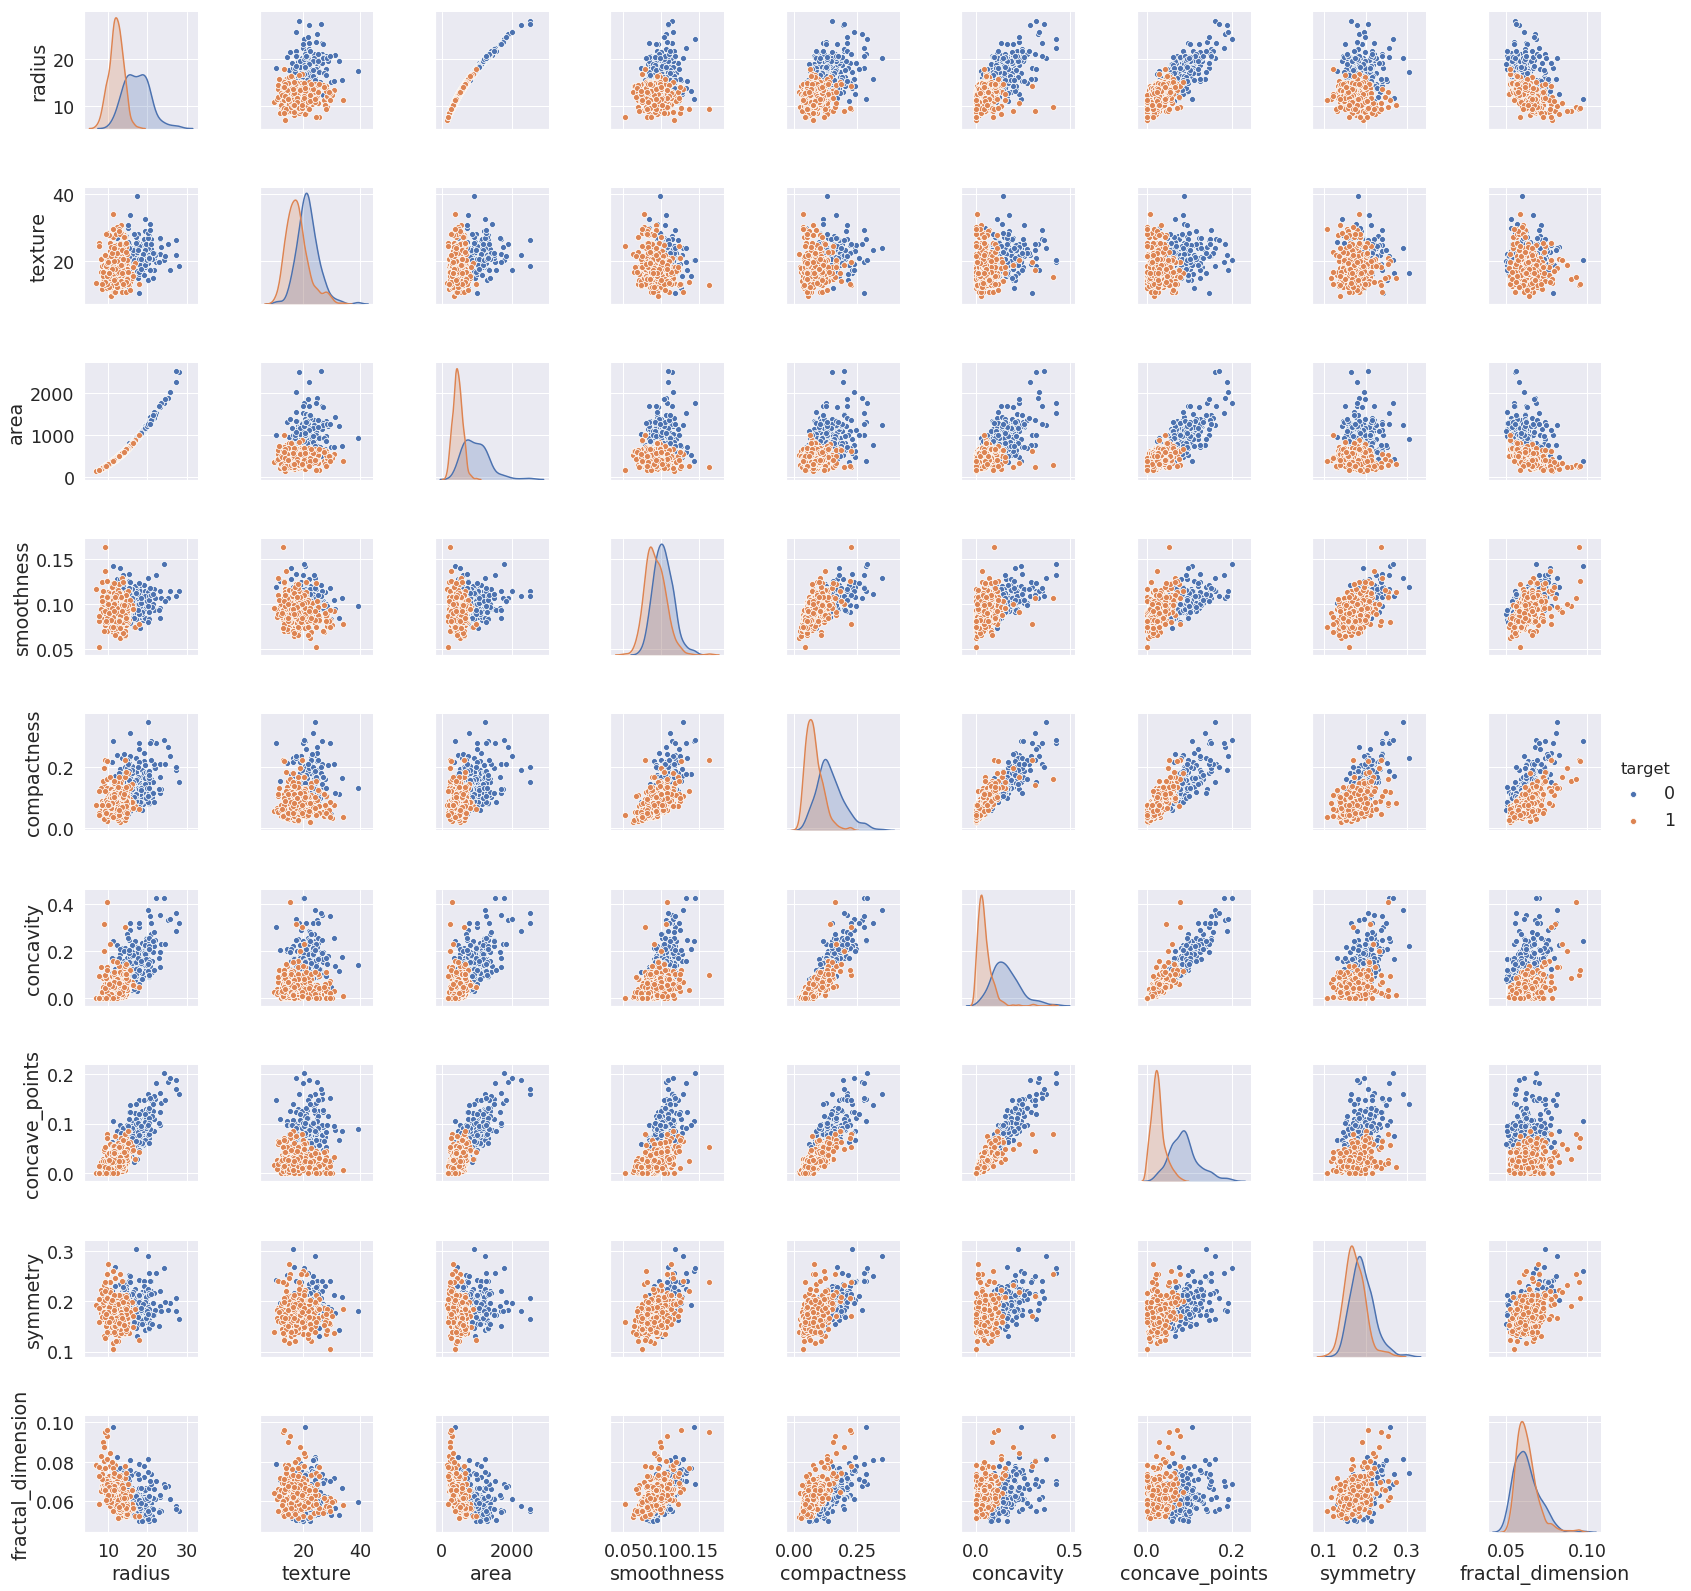

In [47]:
sns.pairplot(data_s, hue = 'target', vars = ['radius', 'texture', 'area', 'smoothness', 'compactness', 'concavity','concave_points', 'symmetry', 'fractal_dimension'] )

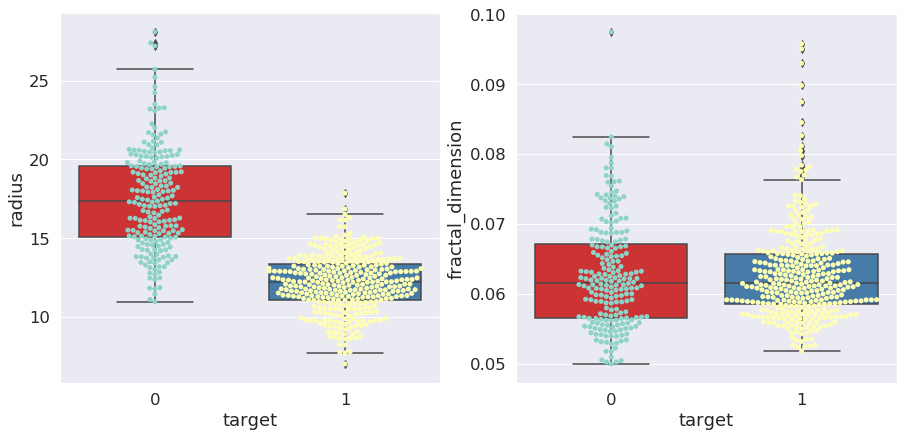

In [127]:
fig,  (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
sns.set_context('notebook', font_scale=1.5)
plt.subplot(2, 2, 1)
sns.boxplot(y="radius", x="target", data=data_s, palette="Set1") 
sns.swarmplot(x="target", y="radius",data=data_s, palette="Set3", dodge=True)

plt.subplot(2, 2, 2)  
sns.boxplot(y="fractal_dimension", x="target", data=data_s, palette="Set1")
sns.swarmplot(x="target", y="fractal_dimension",data=data_s, palette="Set3")
plt.show()

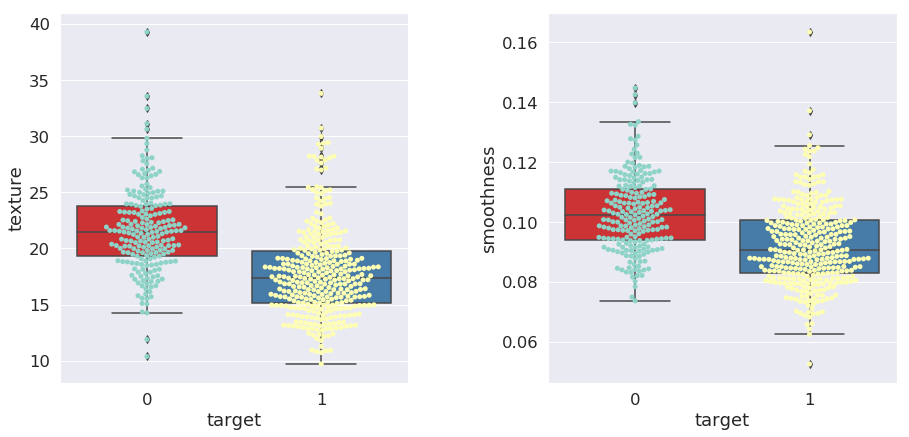

In [130]:
fig,  (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
sns.set_context('notebook', font_scale=1.5)
plt.subplot(2, 2, 1)
sns.boxplot(y="texture", x="target", data=data_s, palette="Set1") 
sns.swarmplot(x="target", y="texture",data=data_s, palette="Set3", dodge=True)
plt.subplot(2, 2, 2)  
sns.boxplot(y="smoothness", x="target", data=data_s, palette="Set1")
sns.swarmplot(x="target", y="smoothness",data=data_s, palette="Set3",
              dodge=True)
plt.subplots_adjust(wspace=0.4); 
plt.show()

In [98]:
data['diagnosis']=data0['diagnosis'].map({'M':1,'B':0})

## Machine learning

Now we start delving into machine learning. We will start with the naive split in scikit learn. Later we will see how t0 define our own split. 

Our aim is to construct a "function" y = f(X) such that the value of y (1 or 0) will be determined once we input the values X into f. The "function" f will be construct by the machine learning algorithm based on the ys and Xs that are already known.

After training our machine learning algorithm we need to test its accuracy. In order to avoid Overfitting we will use the function train_test_split to split the data randomly (random_state = 42) into a train and a test set. The test set will correspond to 20% of the total data (test_size = 0.2).


<img src="CV.png">

In [132]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import time

In [144]:
X = data_s[less_corr_featiures]
y = data_s['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

### Logistic regression

In [163]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [153]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Function to get the best parameter

In [150]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [167]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1500, 2000]
}

model = GridSearchCV(lr, parameters, cv=5)
model.fit(X_train, y_train)

print_results(model)

BEST PARAMS: {'C': 1500}

0.763 (+/-0.111) for {'C': 0.001}
0.776 (+/-0.098) for {'C': 0.01}
0.822 (+/-0.093) for {'C': 0.1}
0.89 (+/-0.068) for {'C': 1}
0.912 (+/-0.045) for {'C': 10}
0.921 (+/-0.033) for {'C': 100}
0.927 (+/-0.022) for {'C': 1000}
0.932 (+/-0.026) for {'C': 1500}
0.927 (+/-0.023) for {'C': 2000}


In [158]:
model.best_estimator_

LogisticRegression(C=1500, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [168]:
joblib.dump(model.best_estimator_, '/home/jnsofini/ml/lr_model.pkl')

['/home/jnsofini/ml/lr_model.pkl']

### Stochastic Gradient Descent, SDG, which is suited for  small  data

In [169]:
from sklearn.svm import SVC
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

model = GridSearchCV(svc, parameters, cv=5)
model.fit(X_train, y_train)

print_results(model)

BEST PARAMS: {'C': 10, 'kernel': 'linear'}

0.886 (+/-0.065) for {'C': 0.1, 'kernel': 'linear'}
0.629 (+/-0.006) for {'C': 0.1, 'kernel': 'rbf'}
0.903 (+/-0.05) for {'C': 1, 'kernel': 'linear'}
0.701 (+/-0.089) for {'C': 1, 'kernel': 'rbf'}
0.91 (+/-0.046) for {'C': 10, 'kernel': 'linear'}
0.688 (+/-0.08) for {'C': 10, 'kernel': 'rbf'}


In [189]:
from sklearn.svm import SVC
svc = SVC()
parameters = {
    'kernel': ['linear'],
    'C': [10, 14, 15, 16, 17]
}

model = GridSearchCV(svc, parameters, cv=5)
model.fit(X_train, y_train)

print_results(model)

BEST PARAMS: {'C': 14, 'kernel': 'linear'}

0.91 (+/-0.046) for {'C': 10, 'kernel': 'linear'}
0.925 (+/-0.05) for {'C': 14, 'kernel': 'linear'}
0.923 (+/-0.058) for {'C': 15, 'kernel': 'linear'}
0.921 (+/-0.056) for {'C': 16, 'kernel': 'linear'}
0.921 (+/-0.059) for {'C': 17, 'kernel': 'linear'}


Write to prickle

In [190]:
joblib.dump(model.best_estimator_, '/home/jnsofini/ml/SVM_model.pkl')

['/home/jnsofini/ml/SVM_model.pkl']

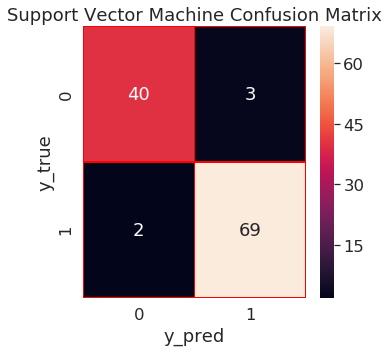

In [194]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Support Vector Machine Confusion Matrix")
plt.show()

### Stochastic Gradient Descent, SDG, which is suited for large data

In [180]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42)
parameters = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 20],
    'penalty': ['l1', 'l2'],
}

model = GridSearchCV(sgd, parameters, cv=5)
model.fit(X_train, y_train)

print_results(model)

BEST PARAMS: {'alpha': 10, 'penalty': 'l1'}

0.462 (+/-0.324) for {'alpha': 0.0001, 'penalty': 'l1'}
0.492 (+/-0.282) for {'alpha': 0.0001, 'penalty': 'l2'}
0.549 (+/-0.275) for {'alpha': 0.001, 'penalty': 'l1'}
0.492 (+/-0.282) for {'alpha': 0.001, 'penalty': 'l2'}
0.554 (+/-0.299) for {'alpha': 0.01, 'penalty': 'l1'}
0.481 (+/-0.256) for {'alpha': 0.01, 'penalty': 'l2'}
0.545 (+/-0.059) for {'alpha': 0.1, 'penalty': 'l1'}
0.484 (+/-0.261) for {'alpha': 0.1, 'penalty': 'l2'}
0.512 (+/-0.311) for {'alpha': 1, 'penalty': 'l1'}
0.495 (+/-0.288) for {'alpha': 1, 'penalty': 'l2'}
0.576 (+/-0.208) for {'alpha': 10, 'penalty': 'l1'}
0.462 (+/-0.196) for {'alpha': 10, 'penalty': 'l2'}
0.576 (+/-0.208) for {'alpha': 20, 'penalty': 'l1'}
0.451 (+/-0.199) for {'alpha': 20, 'penalty': 'l2'}


In [175]:
sgd

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [188]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
parameters = {
    'n_neighbors': [ 4, 5, 8, 10, 20],
    'p': [1, 2],
}

model = GridSearchCV(knn, parameters, cv=5)
model.fit(X_train, y_train)

print_results(model)

BEST PARAMS: {'n_neighbors': 5, 'p': 1}

0.857 (+/-0.085) for {'n_neighbors': 4, 'p': 1}
0.846 (+/-0.066) for {'n_neighbors': 4, 'p': 2}
0.879 (+/-0.068) for {'n_neighbors': 5, 'p': 1}
0.877 (+/-0.083) for {'n_neighbors': 5, 'p': 2}
0.879 (+/-0.069) for {'n_neighbors': 8, 'p': 1}
0.877 (+/-0.062) for {'n_neighbors': 8, 'p': 2}
0.879 (+/-0.061) for {'n_neighbors': 10, 'p': 1}
0.877 (+/-0.081) for {'n_neighbors': 10, 'p': 2}
0.879 (+/-0.07) for {'n_neighbors': 20, 'p': 1}
0.879 (+/-0.075) for {'n_neighbors': 20, 'p': 2}


In [ ]:
joblib.dump(model.best_estimator_, '/--/--/ml/knn_model.pkl')

In [197]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
parameters = {
    'var_smoothing': [1e-09, 1e-08, 1e-10, 1e-11],
}

model = GridSearchCV(nb, parameters, cv=5)
model.fit(X_train, y_train)

print_results(model)

BEST PARAMS: {'var_smoothing': 1e-10}

0.916 (+/-0.017) for {'var_smoothing': 1e-09}
0.912 (+/-0.041) for {'var_smoothing': 1e-08}
0.921 (+/-0.025) for {'var_smoothing': 1e-10}
0.916 (+/-0.035) for {'var_smoothing': 1e-11}


Save the model

In [ ]:
joblib.dump(model.best_estimator_, '/--/--/ml/nb_model.pkl')